## 탐색적 데이터 분석(Exploratory Data Analysis)

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("../data/chipotle.tsv", sep='\t')

### 1.데이터 프레임의 기본정보

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [7]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [9]:
df.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [12]:
df.shape

(4622, 5)

In [13]:
df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

### 2. `10`개의 로우 데이터 

In [15]:
df.head(n = 10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### 3. 컬럼 및 인덱스 출력

In [22]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

order_id : 주문번호<br>
quantity : 아이템의 주문 수량<br>
item_name : 주문한 아이템의 이름<br>
choice_description : 주문한 아이템의 상세 선택 옵션<br>
item_price : 주문 아이템의 가격

In [21]:
df.index

RangeIndex(start=0, stop=4622, step=1)

### 4. 기초 통계량

In [24]:
df.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### 5. 전처리 

#### 5.1 컬럼의 데이터 타입 변경

In [27]:
df['order_id'] = df['order_id'].astype('str')
df.dtypes

order_id              object
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

#### 5.2 주문통계

In [51]:
# order_id의 갯수 
len(df['order_id'].unique())

1834

In [52]:
len(df['order_id'].unique())

1834

In [55]:
# 1.가장 많이 주문된 아이템의 top 5
item_count = df['item_name'].value_counts()[:5]
item_count

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

In [46]:
# 2.가장 많이 주문된 아이템의 top 5
df1 = df.groupby('item_name').count()  # item_name의 groupby후 count()함수 사용
item_order_df = df1.sort_values(by='quantity', ascending=False)  # sort_values(by='quantiy', ascending=Fase)
item_order_df.head()

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,726,726,726,726
Chicken Burrito,553,553,553,553
Chips and Guacamole,479,479,0,479
Steak Burrito,368,368,368,368
Canned Soft Drink,301,301,301,301


In [64]:
# 3.item당 주문갯수 총량_ 가장 많이 팔린 상품
item_qty = df.groupby('item_name')['quantity'].sum()
item_qty.reset_index().sort_values(by = 'quantity', ascending = False).head(n = 10)

,item_name,quantity
17,Chicken Bowl,761
18,Chicken Burrito,591
25,Chips and Guacamole,506
39,Steak Burrito,386
10,Canned Soft Drink,351
23,Chips,230
38,Steak Bowl,221
6,Bottled Water,211
24,Chips and Fresh Tomato Salsa,130
9,Canned Soda,126


In [67]:
# 가장 안 팔린 상품
item_qty.reset_index().sort_values(by = 'quantity').head(n = 10)

,item_name,quantity
14,Carnitas Salad,1
46,Veggie Crispy Tacos,1
26,Chips and Mild Fresh Tomato Salsa,1
33,Crispy Tacos,2
36,Salad,2
7,Bowl,4
41,Steak Salad,4
47,Veggie Salad,6
15,Carnitas Salad Bowl,6
8,Burrito,6


In [78]:
df.loc[df['item_name']=='Barbacoa Burrito', 'item_price']

21       $8.99 
81       $9.25 
121      $9.25 
130     $11.75 
144     $11.75 
         ...   
4355    $11.75 
4358     $9.25 
4592    $11.75 
4602     $9.25 
4603     $9.25 
Name: item_price, Length: 91, dtype: object

### 신용카드 이용금액 분석

In [87]:
cardUsage = pd.read_csv("../data/credit_card_data.csv")
cardUsage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pop_cd                            3888 non-null   object 
 1   year                              3888 non-null   int64  
 2   month                             3888 non-null   int64  
 3   avg_score                         3888 non-null   int64  
 4   avg_rat                           3888 non-null   int64  
 5   city                              3456 non-null   object 
 6   sex                               432 non-null    object 
 7   ages                              3888 non-null   object 
 8   population                        3888 non-null   int64  
 9   num_opencard                      3888 non-null   float64
 10  num_usecard                       3888 non-null   float64
 11  monthly_card_spend                3888 non-null   int64  
 12  monthl

In [85]:
cardUsage.dtypes

pop_cd                               object
year                                  int64
month                                 int64
avg_score                             int64
avg_rat                               int64
city                                 object
sex                                  object
ages                                 object
population                            int64
num_opencard                        float64
num_usecard                         float64
monthly_card_spend                    int64
monthly_lc                            int64
monthly_loan                          int64
monthly_bk_loan                       int64
monthly_cd_loan                       int64
monthly_installments_loan             int64
monthly_insurance_loan                int64
monthly_sbk_loan                      int64
loan_commitment                       int64
inst_rep_loanb                        int64
ls_rep_loanb                          int64
credit_loan                     

In [89]:
cardUsage.describe()

,year,month,avg_score,avg_rat,population,num_opencard,num_usecard,monthly_card_spend,monthly_lc,monthly_loan,...,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment
count,3888.000000,3888.000000,3888.000000,3888.000000,3.888000e+03,3888.000000,3888.000000,3.888000e+03,3.888000e+03,3.888000e+03,...,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3.888000e+03,3888.000000
mean,2016.500000,6.500000,801.297325,3.246914,5.878032e+05,2.332796,1.279462,8.232536e+05,7.005477e+07,5.993902e+07,...,2.401780e+06,1.674465e+06,8.476929e+05,1.098907e+07,1.892440e+07,2.902791e+07,1.993650e+07,7.703108e+07,4.199642e+05,141464.506173
std,0.500064,3.452497,22.924493,0.443042,1.051777e+06,1.389002,0.761102,6.207234e+05,3.134869e+07,2.706806e+07,...,1.773271e+06,1.413189e+06,7.746605e+05,6.303980e+06,1.102648e+07,1.561675e+07,8.856546e+06,3.470092e+07,3.724923e+05,115444.741416
min,2016.000000,1.000000,726.000000,2.000000,2.000000e+03,0.090000,0.020000,2.000000e+04,3.500000e+06,3.500000e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+06,0.000000e+00,3.500000e+06,0.000000e+00,0.000000
25%,2016.000000,3.750000,783.000000,3.000000,7.800000e+04,1.110000,0.620000,2.075000e+05,4.464000e+07,3.794250e+07,...,7.100000e+05,5.375000e+05,2.100000e+05,6.197500e+06,9.747500e+06,1.886000e+07,1.353000e+07,4.861750e+07,7.600000e+04,26750.000000
50%,2016.500000,6.500000,808.000000,3.000000,2.185000e+05,2.210000,1.330000,7.500000e+05,7.597000e+07,6.477500e+07,...,2.290000e+06,1.230000e+06,6.400000e+05,1.116000e+07,1.653500e+07,2.906000e+07,1.860500e+07,8.112500e+07,2.790000e+05,105000.000000
75%,2017.000000,9.250000,819.000000,4.000000,4.440000e+05,3.650000,1.950000,1.450000e+06,9.137500e+07,7.816000e+07,...,4.100000e+06,2.670000e+06,1.350000e+06,1.579250e+07,2.645000e+07,3.741000e+07,2.687000e+07,1.011700e+08,7.852500e+05,253000.000000
max,2017.000000,12.000000,850.000000,4.000000,5.160000e+06,5.170000,2.790000,2.300000e+06,1.817200e+08,1.658500e+08,...,5.960000e+06,6.980000e+06,4.350000e+06,2.800000e+07,4.891000e+07,1.106000e+08,9.217000e+07,1.830500e+08,1.367000e+06,402000.000000


In [92]:
cardUsage.head()

,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment
0,L011,2016,1,812,2,서울,NaN,10대,55000,1.44,...,0,0,0,1120000,8210000,78020000,92170000,87260000,0,0
1,L011,2016,2,773,4,서울,NaN,10대,380000,1.71,...,510000,220000,1020000,680000,4660000,23300000,8260000,42410000,4000,1000
2,L011,2016,3,771,4,서울,NaN,10대,387000,1.75,...,490000,210000,1140000,640000,4370000,22930000,8300000,41710000,3000,1000
3,L011,2016,4,770,4,서울,NaN,10대,412000,1.76,...,510000,240000,1340000,510000,4770000,22160000,9460000,41040000,4000,1000
4,L011,2016,5,771,4,서울,NaN,10대,414000,1.75,...,490000,340000,1490000,640000,4740000,21960000,9660000,40850000,3000,1000


In [93]:
cardUsage['year'].value_counts()

2017    1944
2016    1944
Name: year, dtype: int64

### 1.연령대별 월 카드 이용 총금액

전국민 카드 및 대출 이용통계 데이터 연령대/거주지/성별 구분에
따른 카드 및 대출 이용통계 데이터로, 구분 값 별 카드이용금액 비교,
대출금액 및 대출 특이사항 비교 등이 가능하다.

1. 연령대별 월 카드 이용 총 금액

2. 지역별 월 카드 이용 총 금액

3. 30대의 총 대출 금액은 얼마인가요?

4. 30대의 월 카드 이용 금액을 그래프로 나타내 보세요.

### 1.연령대별 월 카드 이용 총 금액

In [141]:
ages_cardUsage = cardUsage.groupby(['ages', 'month']).monthly_card_spend.sum()
ages_cardUsage = ages_cardUsage.reset_index()

ages_cardUsage.sort_values(by = 'monthly_card_spend', ascending = False)

,ages,month,monthly_card_spend
43,40대,8,67330000
44,40대,9,66870000
47,40대,12,66590000
41,40대,6,66570000
36,40대,1,65840000
...,...,...,...
107,90대,12,3350000
102,90대,7,3260000
100,90대,5,3240000
97,90대,2,3150000


### 2. 지역별 월 카드 이용 총 금액

In [102]:
city_cardUsage = cardUsage.groupby(['city', 'month']).monthly_card_spend.sum()
city_cardUsage.reset_index()

,city,month,monthly_card_spend
0,강원,1,14660000
1,강원,2,13950000
2,강원,3,13270000
3,강원,4,14890000
4,강원,5,14210000
...,...,...,...
187,충북,8,14130000
188,충북,9,14160000
189,충북,10,13950000
190,충북,11,14220000


3. 30대의 총 대출 금액은 얼마인가요?

In [107]:
loneExec = cardUsage.groupby('ages')['loan_commitment'].sum()
loneExec.filter(like='30',axis =0)

ages
30대    4053830000
Name: loan_commitment, dtype: int64

Text(0.5, 1.0, '30대의 월별 카드 사용금액')

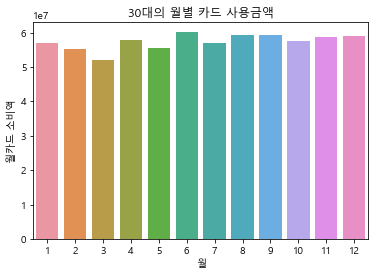

In [142]:
#4.30대의 월 카드 이용금액을 그래프로 출력
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

ages_cardUsage = cardUsage.groupby(['ages', 'month']).monthly_card_spend.sum()
cardUsage30 = ages_cardUsage.filter(like='30', axis = 0)
df = cardUsage30.reset_index()
df.columns = ['연령대', '월', '월카드 소비액']

ax = plt.subplots()
ax = sns.barplot(x = df['월'], y = df['월카드 소비액'])
ax.set_title('30대의 월별 카드 사용금액')

Text(0, 0.5, '카드 사용금액')

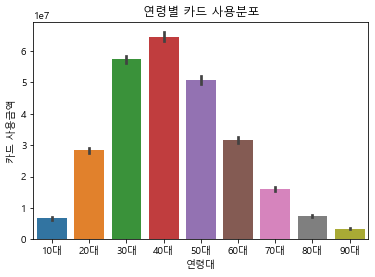

In [161]:
#5.연령대의 월 카드 이용금액을 그래프로 출력
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

ages_cardUsage = cardUsage.groupby(['ages', 'month']).monthly_card_spend.sum()
df = ages_cardUsage.reset_index()
df
ax = plt.subplots()
ax = sns.barplot(x = df['ages'], y = df['monthly_card_spend'])
ax.set_title('연령별 카드 사용분포')
ax.set_xlabel('연령대')
ax.set_ylabel('카드 사용금액')